In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import matplotlib.pyplot as plt

# Problem 1:
### A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv


In [15]:
df = pd.read_csv('Fever.csv')
df.head(10)

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6
5  1  2          2     4.2
6  1  2          3     4.9
7  1  2          4     4.7
8  1  3          1     4.8
9  1  3          2     4.5

In [242]:
df.shape

(36, 4)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


# Inference
# There are 36 rows and 4 columns
# there are no null values

In [244]:
df.Relief.describe()

count    36.000000
mean      7.183333
std       3.272090
min       2.300000
25%       4.675000
50%       6.000000
75%       9.325000
max      13.500000
Name: Relief, dtype: float64

# Inference

# Minimum hours of relief is 2.3 hours
# Maximum hours of relief is 13.5 hours
# Average hours of relief is 7.18 hours

# Before Anova analysis we need to convert columns A , B and  Volunteer into categorical variable

In [245]:
df.A = pd.Categorical(df.A)

In [246]:
df.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [248]:
Arelief=pd.crosstab(df['A'], df['Relief'])
Arelief.T

A       1  2  3
Relief         
2.3     1  0  0
2.4     1  0  0
2.5     1  0  0
2.7     1  0  0
4.2     1  0  0
4.4     1  0  0
4.5     1  0  0
4.6     2  0  0
4.7     1  0  0
4.8     1  0  0
4.9     1  0  0
5.2     0  1  0
5.3     0  1  0
5.5     0  1  0
5.7     0  0  1
5.8     0  1  0
5.9     0  0  1
6.1     0  0  1
6.2     0  0  1
8.7     0  2  0
8.9     0  1  0
9.0     0  1  0
9.1     0  2  0
9.3     0  1  0
9.4     0  1  0
9.9     0  0  1
10.1    0  0  1
10.5    0  0  1
10.6    0  0  1
13.0    0  0  1
13.2    0  0  1
13.3    0  0  1
13.5    0  0  1

In [110]:
df.B = pd.Categorical(df.B)

In [111]:
df.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [249]:
Brelief=pd.crosstab(df['B'], df['Relief'])
Brelief.T

B       1  2  3
Relief         
2.3     1  0  0
2.4     1  0  0
2.5     1  0  0
2.7     1  0  0
4.2     0  1  0
4.4     0  0  1
4.5     0  0  1
4.6     0  1  1
4.7     0  1  0
4.8     0  0  1
4.9     0  1  0
5.2     1  0  0
5.3     1  0  0
5.5     1  0  0
5.7     1  0  0
5.8     1  0  0
5.9     1  0  0
6.1     1  0  0
6.2     1  0  0
8.7     0  1  1
8.9     0  1  0
9.0     0  1  0
9.1     0  1  1
9.3     0  0  1
9.4     0  0  1
9.9     0  1  0
10.1    0  1  0
10.5    0  1  0
10.6    0  1  0
13.0    0  0  1
13.2    0  0  1
13.3    0  0  1
13.5    0  0  1

In [251]:
df.Volunteer = pd.Categorical(df.Volunteer)

In [252]:
df.Volunteer.value_counts()

4    9
3    9
2    9
1    9
Name: Volunteer, dtype: int64

In [253]:
vol_relief=pd.crosstab(df['Volunteer'], df['Relief'])
vol_relief.T

Volunteer  1  2  3  4
Relief               
2.3        0  0  1  0
2.4        1  0  0  0
2.5        0  0  0  1
2.7        0  1  0  0
4.2        0  1  0  0
4.4        0  0  1  0
4.5        0  1  0  0
4.6        1  0  0  1
4.7        0  0  0  1
4.8        1  0  0  0
4.9        0  0  1  0
5.2        0  1  0  0
5.3        0  0  0  1
5.5        0  0  1  0
5.7        0  1  0  0
5.8        1  0  0  0
5.9        0  0  1  0
6.1        1  0  0  0
6.2        0  0  0  1
8.7        0  0  2  0
8.9        1  0  0  0
9.0        0  0  0  1
9.1        1  1  0  0
9.3        0  1  0  0
9.4        0  0  0  1
9.9        1  0  0  0
10.1       0  0  0  1
10.5       0  1  0  0
10.6       0  0  1  0
13.0       0  1  0  0
13.2       0  0  0  1
13.3       0  0  1  0
13.5       1  0  0  0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B2B74AE460>]],
      dtype=object)

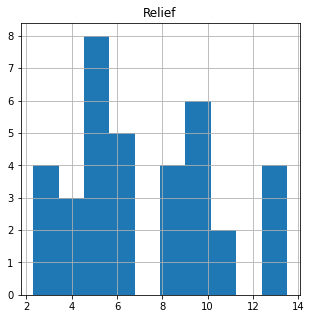

In [114]:
data_df = df.drop(['A','B','Volunteer'], axis=1 )
data_df.hist(figsize=(5,5))

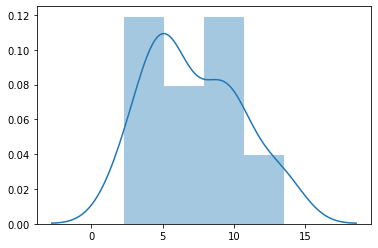

In [115]:
sns.distplot(data_df)

In [16]:
fig = plt.figure(figsize=(15,5))
sns.boxplot(x="A", y="Relief", data=df,hue='Volunteer')
plt.title('HOURS OF RELIEF WITH A COMPOUND AT THREE LEVELS')
plt.xlabel('A COMPOUND')
plt.ylabel('RELIEF IN HOURS')
plt.grid()
plt.show()

### INFERENCE:
####    Level 1 treatment of A compound seems to give relief within 2.3 - 5 hours for the volunteers
####   Level 2 treatment of A compound seems to give relief within 5 - 9 hours for the volunteers
####    Level 3 treatment of A compound seems to give relief within 6 - 13.5 hours but taking more time than other two levels
    
    

In [17]:
fig = plt.figure(figsize=(15,5))
sns.boxplot(x="B", y="Relief", data=df,hue='Volunteer')
plt.title('HOURS OF RELIEF WITH B COMPOUND AT THREE LEVELS')
plt.xlabel('B COMPOUND')
plt.ylabel('RELIEF IN HOURS')
plt.grid()
plt.show()

### INFERENCE:
####    Level 1 treatment of B compound seems to give relief within 2.3 - 6 hours for the volunteers
####   Level 2 treatment of B compound seems to give relief within 4 - 11 hours for the volunteers
####    Level 3 treatment of B compound seems to give relief within 4 - 13.5 hours but taking more time than other two levels
    
    

# 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

# A COMPOUND

# 𝐻0  : The means of 'Relief' variable with respect to each level of 'A' is equal.
# H0:  µ1= µ2=µ3=µ4=……=µk 
# 𝐻1 : At least one of the means of 'Relief' variable with respect to each level of A is unequal
# H1 : µ1!= µ2!=µ3!=µ4!=……!=µk (Not all the means are equal)

# B COMPOUND
# 𝐻0 : The means of 'Relief' variable with respect to each level of 'B' is equal.
# H0: µ1= µ2=µ3=µ4=……=µk
# 𝐻1 : At least one of the means of 'Relief' variable with respect to each level of 'B' is unequal
# H1 : µ1!= µ2!=µ3!=µ4!=……!=µk (Not all the means are equal)


# 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

# One-way ANOVA with the 'A' variable.

In [118]:
formula = 'Relief ~ C(A)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


# Inference
### Since the p value in this scenario is less than  𝛼 <(0.05), we can say that we reject the Null Hypothesis ( 𝐻0 ).
### The hours of relief varies at each level with A compound treatment

# 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

# One-way ANOVA with the 'B' variable

# B COMPOUND

# 𝐻0  : The means of 'Relief' variable with respect to each level of 'B' is equal.
# H0:  µ1= µ2=µ3=µ4=……=µk 
# 𝐻1 : At least one of the means of 'Relief' variable with respect to each level of 'B' is unequal
# H1 : µ1!= µ2!=µ3!=µ4!=……!=µk (Not all the means are equal)

In [119]:
formula = 'Relief ~ C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


# Inference
### Since the p value in this scenario is less than  𝛼  <(0.05), we can say that we reject the Null Hypothesis ( 𝐻0 ).
### The hours of relief varies at each level with B compound treatment

# 1.4) Analyse the effects of one variable on another with the help of an interaction plot.
# What is an interaction between two treatments?
# [hint: use the ‘pointplot’ function from the ‘seaborn’ function]


### Formulate the hypothesis of ANOVA with both 'A' and 'B' variables with respect to the variable 'Relief'.

#### $H_0$ : There is interaction between compounds A and B

#### $H_1$ : There is no interaction between compounds A and B

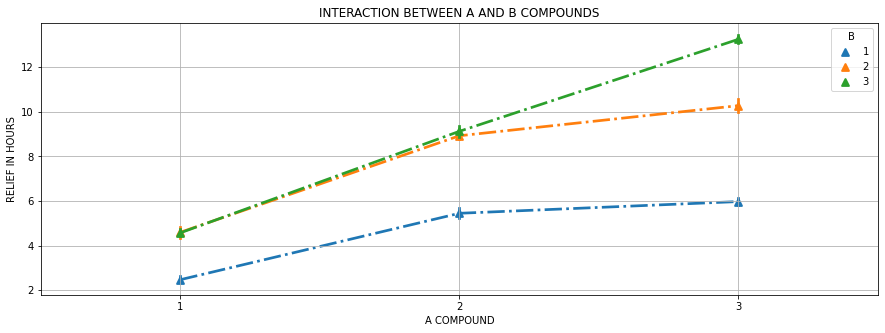

In [120]:
fig = plt.figure(figsize=(15,5))
sns.pointplot(x = 'A', y = 'Relief',hue='B',markers = '^',linestyles = '-.', data=df)
plt.title('INTERACTION BETWEEN A AND B COMPOUNDS')
plt.xlabel('A COMPOUND')
plt.ylabel('RELIEF IN HOURS')
plt.grid()
plt.show()

#### An interaction effect can usually be  a set of non-parallel lines. 
#### Based on plot we can interpret that there is  no significant interaction between 1 and 2 level treatment in A and B compunds
#### There seem to be slight interaction between 2nd and 3rd level treatment in A and B compounds

In [121]:
#Interaction Effect:
model=ols('Relief~C(A)+C(B)+C(A):C(B)',data=df).fit()
aov_table=anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


#### As A and B compound interaction is  0.0000000000000000697 which <0.05 , there seems to be  no statistical interaction.
### There is no interaction between A and B compounds

# 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.

### Formulate the hypothesis of ANOVA with both 'A' and 'B' variables with respect to the variable 'Relief'.
#### $H_0$ : The means of 'Relief' variable with respect to each level of 'A' category and 'B' category is equal.

#### $H_1$ : At least one of the means of 'Relief' variable with respect to each level of 'A' category and 'B' is unequal.

In [4]:
formula = 'Relief ~ C(A) + C(B)+C(A) : C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


#### Considering both the factors(A and B), Both A and B has a significant factor as the p value is <0.05. so,we can say that we reject the Null Hypothesis ( 𝐻0 ).
#### We can conclude that  there is a statistically significant difference in the hours of relief between A and B medicines 

# 1.6) Mention the business implications of performing ANOVA for this particular case study.

#### ANOVA (known as Analysis of Variance) is a technique which is used to check whether the means of two or more sample groups are statistically different or not.

#### Suppose in the Healthcare Industry, we can use the ANOVA test to compare different medications and the effect on patients. We can compare which medication works better for treatment and hence we able to choose the best one.

#### A research laboratory was developing a new compound for the relief of severe cases of hay fever. hay fever research experiment conducted with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each.

### After performing one way Anova analysis on A and B separetely , we can conclude that
###    A compound:
####                 - Since the p value in this scenario is less than  𝛼 <(0.05), we can say that we reject the Null Hypothesis ( 𝐻0 ).
####                 -  The hours of relief varies at each level with A compound treatment

###     B compound:
####                  - Since the p value in this scenario is less than  𝛼  <(0.05), we can say that we reject the Null Hypothesis ( 𝐻0 ).
####                  -The hours of relief varies at each level with B compound treatment

###  Interaction between A and B in the plot:

#### 1.An interaction effect can usually be seen as a set of non-parallel lines. 
#### 2.Based on plot we can interpret that there is  no significant interaction between 1 and 2 level treatment in A and B compunds
#### 3.There seem to be slight interaction between 2nd and 3rd level treatment in A and B compounds

###  Interaction effect between A and B components based on Anova analysis:

#### 1. As A and B compound interaction is  0.0000000000000000697 which <0.05 , there seems to be  no statistical interaction.
#### 2. There is no interaction between A and B compounds

### Two-way ANOVA with A and B components:

#### Considering both the factors(A and B), Both A and B has a significant factor as the p value is <0.05. so,we can say that we reject the Null Hypothesis ( 𝐻0 ).
#### We can conclude that  there is a statistically significant difference in the hours of relief between A and B medicines 

## Conclusion:

#### Based on Anova analysis of A and B compounds , we can conclude 3rd level of variation in A and B compounds gives more hours of relief for severe cases of hay fever .There are no significant interaction between A and B compounds. We can also conclude that , there is a statistically significant difference in the hours of relief between A and B medicines 

# ============================================================================================================================
### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Problem 2:
#### The dataset Education - Post 12th Standard.csv is a dataset which contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

#### 1)      Names: Names of various university and colleges										
#### 2)      Apps: Number of applications received										
#### 3)      Accept: Number of applications accepted										
#### 4)      Enroll: Number of new students enrolled										
#### 5)      Top10perc: Percentage of new students from top 10% of Higher Secondary class										
#### 6)      Top25perc: Percentage of new students from top 25% of Higher Secondary class										
#### 7)      F.Undergrad: Number of full-time undergraduate students										
#### 8)      P.Undergrad: Number of part-time undergraduate students										
#### 9)      Outstate: Number of students for whom the particular college or university is Out-of-state tuition										
#### 10)   Room.Board: Cost of Room and board										
#### 11)   Books: Estimated book costs for a student										
#### 12)   Personal: Estimated personal spending for a student										
#### 13)   PhD: Percentage of faculties with Ph.D.’s										
#### 14)   Terminal: Percentage of faculties with terminal degree										
#### 15)   S.F.Ratio: Student/faculty ratio										
#### 16)   perc.alumni: Percentage of alumni who donate										
#### 17)   Expend: The Instructional expenditure per student										
#### 18)   Grad.Rate: Graduation rate										



## 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

In [2]:
df1 = pd.read_csv('Education - Post 12th Standard-1.csv')
df1.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [124]:
df1.shape

(777, 18)

### Number of rows = 777
### Number of columns = 18

In [125]:
len(df1)

777

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

### This dataset contains 777 entries and 18 columns
### There are one object ,one float and 16 int datatypes

In [3]:
df1.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

### There seems to be outliers.we can confirm it in further analysis 

In [128]:
df1.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

#### There are no null values

In [129]:
df1.Names.unique()

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Agnes Scott College',
       'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College', 'Alfred University',
       'Allegheny College', 'Allentown Coll. of St. Francis de Sales',
       'Alma College', 'Alverno College',
       'American International College', 'Amherst College',
       'Anderson University', 'Andrews University',
       'Angelo State University', 'Antioch University',
       'Appalachian State University', 'Aquinas College',
       'Arizona State University Main campus',
       'Arkansas College (Lyon College)', 'Arkansas Tech University',
       'Assumption College', 'Auburn University-Main Campus',
       'Augsburg College', 'Augustana College IL', 'Augustana College',
       'Austin College', 'Averett College', 'Baker University',
       'Baldwin-Wallace College', 'Barat College', 

In [130]:
df1.Names.nunique()

777

In [3]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df1[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Names, Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, Outstate, Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate]
Index: []

#### There are no duplicates in this dataset

### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Univariate Analysis

#### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Now let us check the distribution of the data.

In [3]:
df2 = df1.drop(['Names'], axis=1)

In [133]:

plt.figure(figsize=(5,5))
plt.hist(df2,bins= 10) 



(array([[15.,  2.,  0., ...,  0.,  0.,  0.],
        [14.,  2.,  1., ...,  0.,  0.,  0.],
        [15.,  1.,  1., ...,  0.,  0.,  0.],
        ...,
        [15.,  2.,  0., ...,  0.,  0.,  0.],
        [13.,  2.,  0., ...,  1.,  0.,  0.],
        [17.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([    0. ,  5623.3, 11246.6, 16869.9, 22493.2, 28116.5, 33739.8,
        39363.1, 44986.4, 50609.7, 56233. ]),
 <a list of 777 Lists of Patches objects>)

In [134]:
df2.hist(figsize=(20,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B2BF52D400>,
      dtype=object)

#### Most of the variable is left skewed and only terminal is right skewed

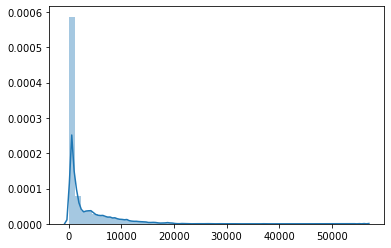

In [135]:
sns.distplot(df2)

### the whole dataset is left skewed

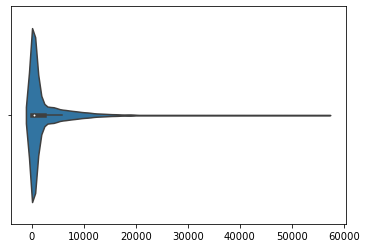

In [136]:
sns.violinplot(df2)

### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Cumulative Distribution

In [137]:
sns.distplot(df2, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

# A cumulative distribution function (CDF) plot shows the empirical cumulative distribution function of the data.CDF plots are useful for comparing the distribution of different sets of data.

### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Multivariate analysis

In [138]:
sns.pairplot(df2)


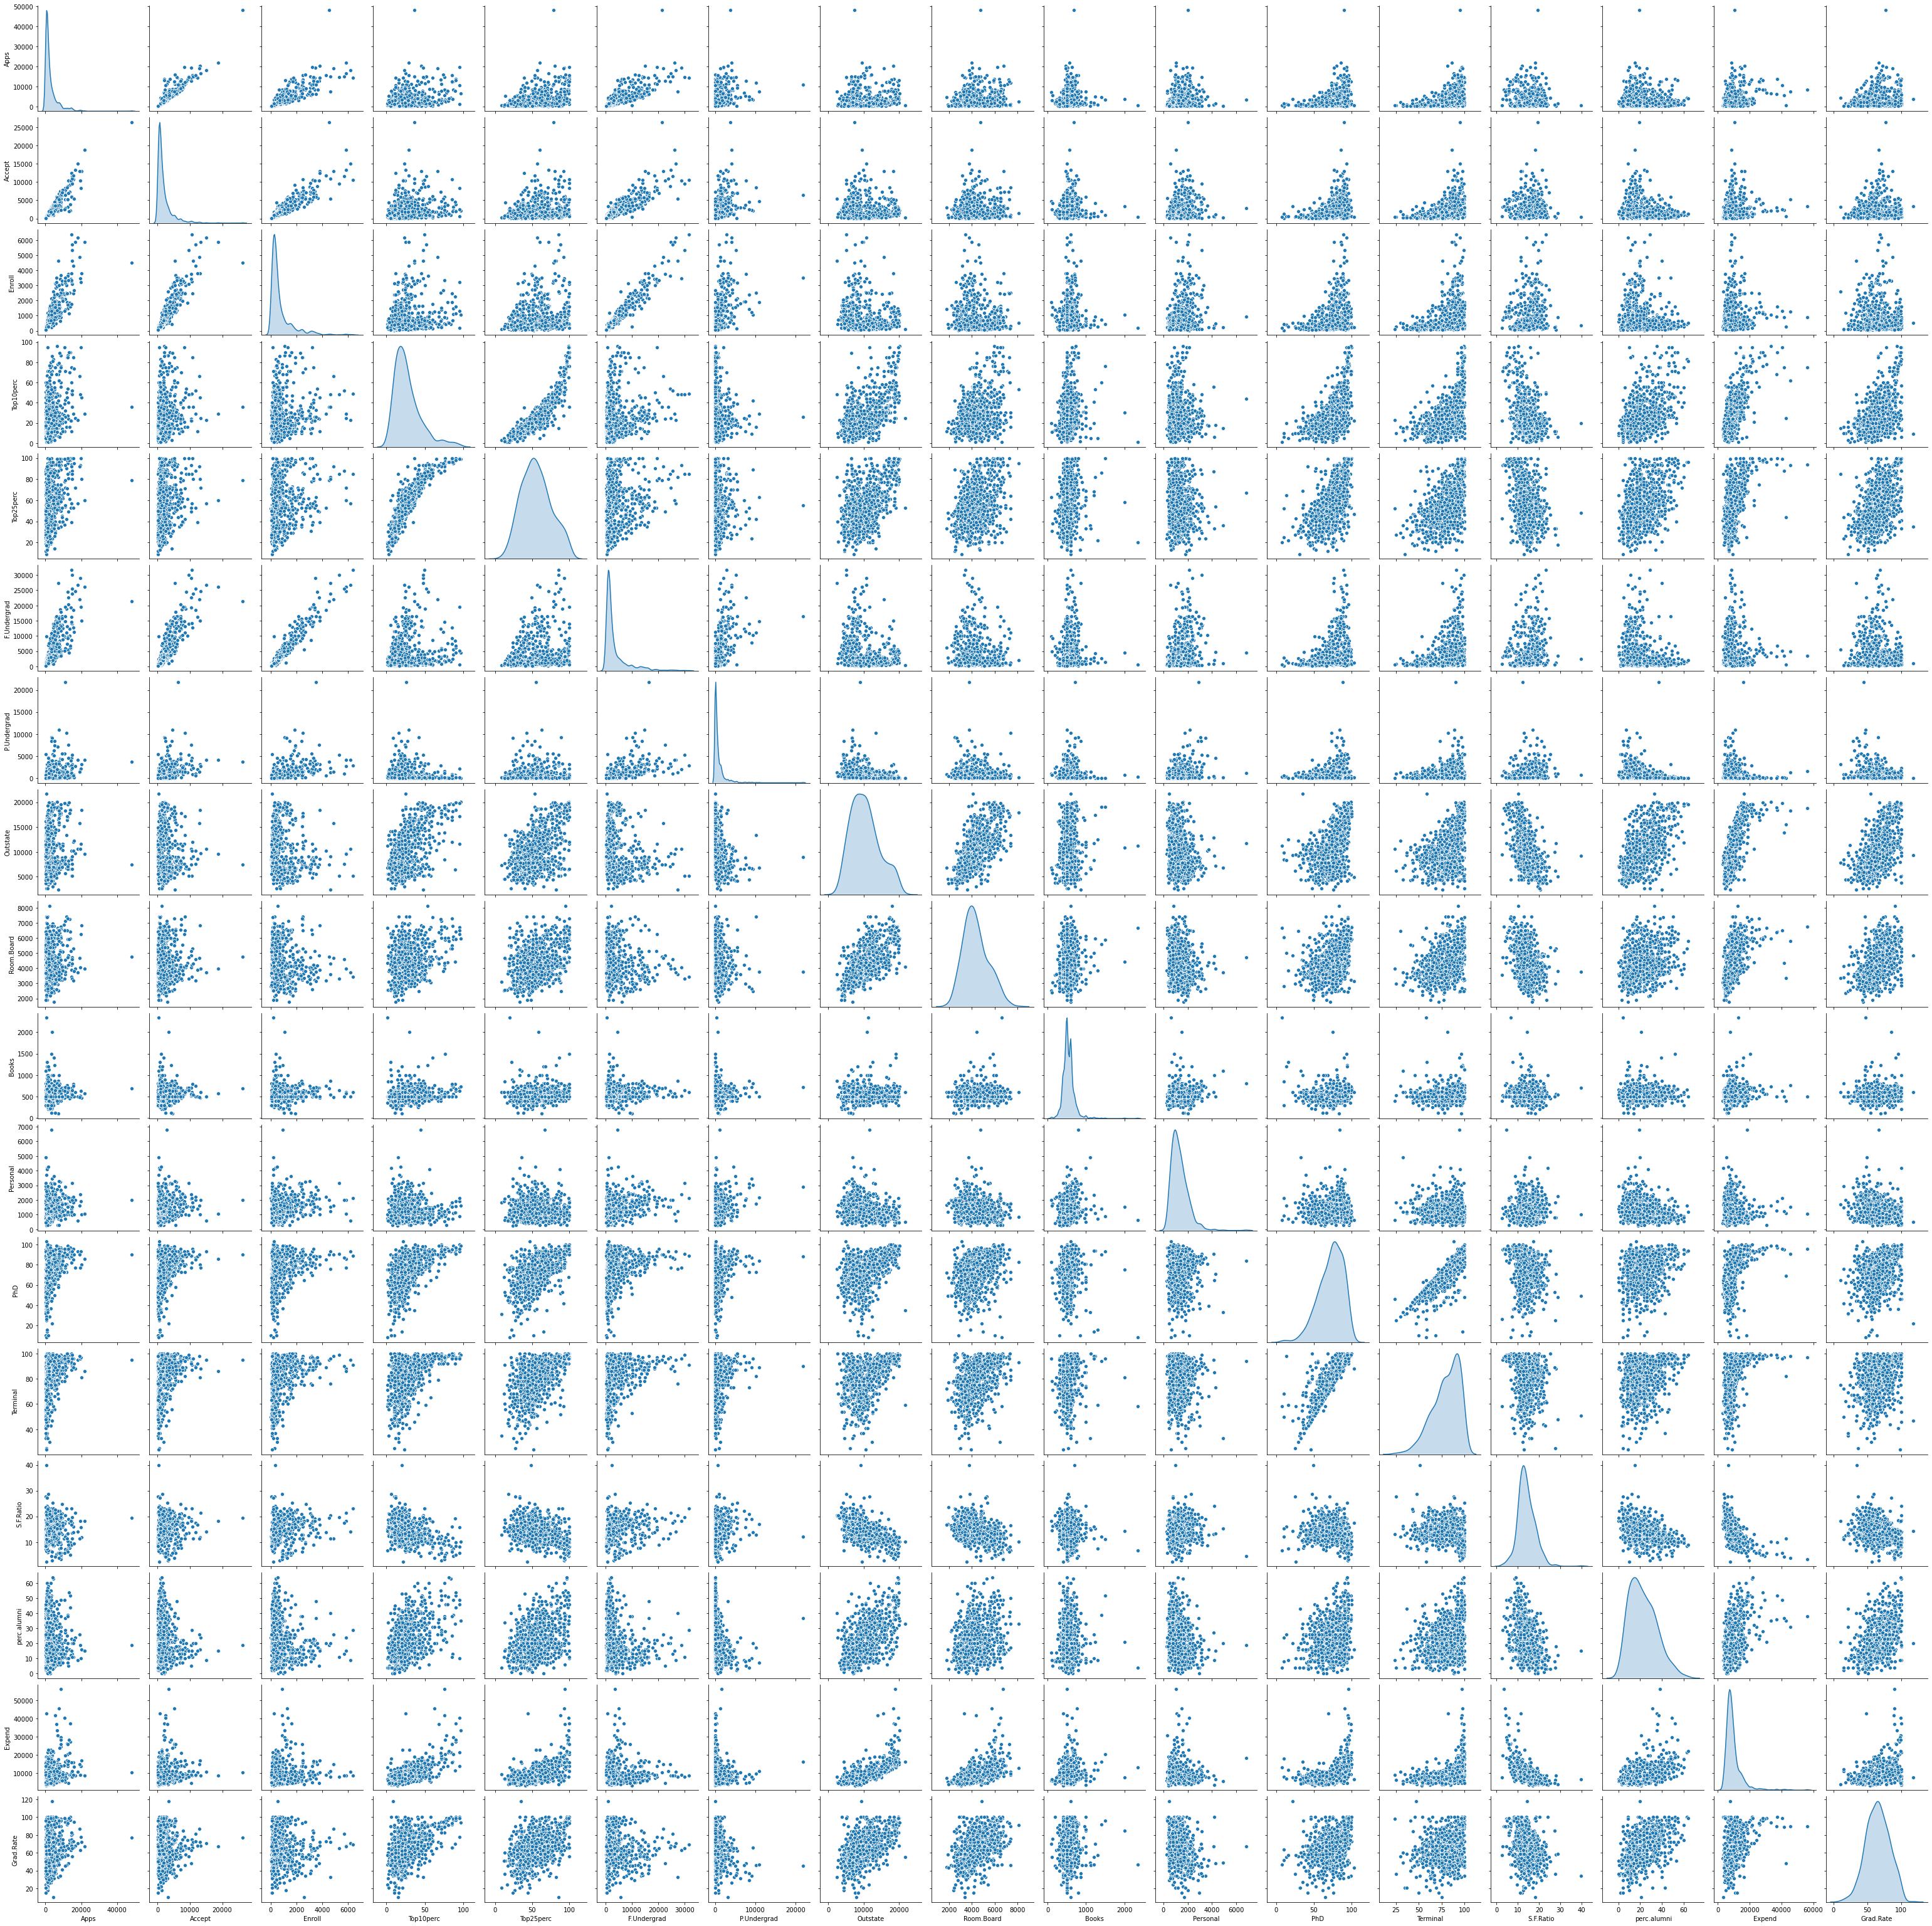

In [139]:
sns.pairplot(df2,diag_kind='kde')

# A scatter plot is a visual representation of the degree of correlation between any two columns. 
# There are more correlation between Apps and Accept variables
# Range is different for each variable.

In [140]:
df2.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

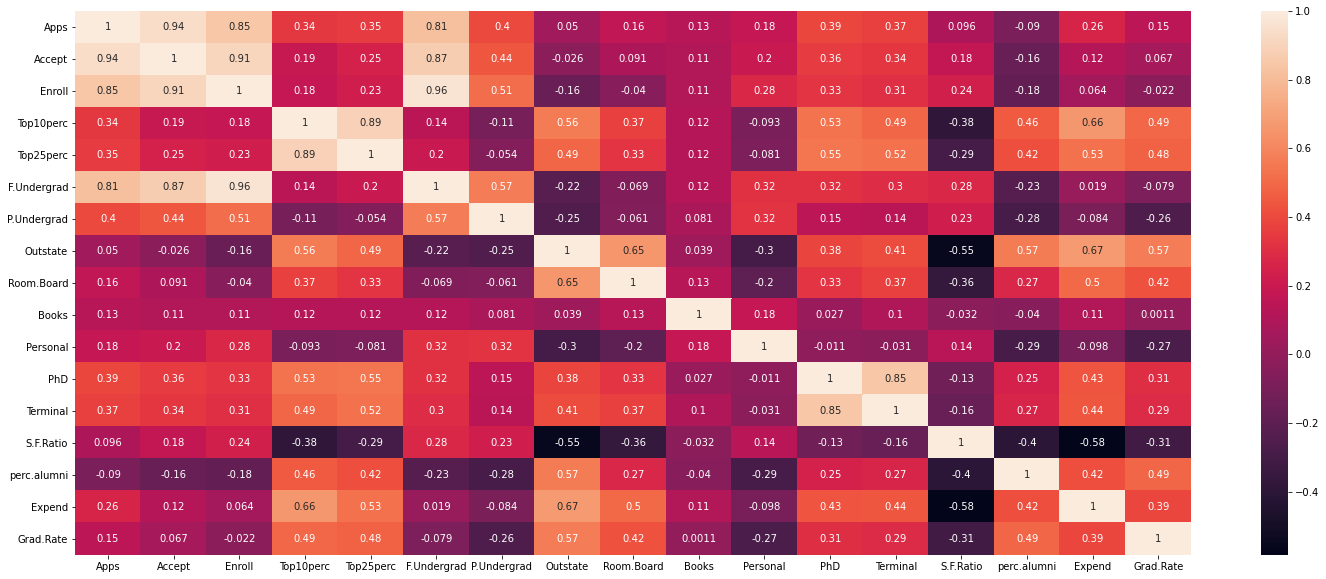

In [141]:
plt.subplots(figsize=(25,10))
sns.heatmap(df2.corr(), annot=True)

# There is high negative correlation between the Expend and S.F.Ratio
# There are more correlation between Apps and Accept variables

In [142]:
df2.cov()

Apps        Accept        Enroll     Top10perc  \
Apps         1.497846e+07  8.949860e+06  3.045256e+06  23132.773138   
Accept       8.949860e+06  6.007960e+06  2.076268e+06   8321.124872   
Enroll       3.045256e+06  2.076268e+06  8.633684e+05   2971.583415   
Top10perc    2.313277e+04  8.321125e+03  2.971583e+03    311.182456   
Top25perc    2.695266e+04  1.201340e+04  4.172592e+03    311.630480   
F.Undergrad  1.528970e+07  1.039358e+07  4.347530e+06  12089.113681   
P.Undergrad  2.346620e+06  1.646670e+06  7.257907e+05  -2829.474981   
Outstate     7.809704e+05 -2.539623e+05 -5.811885e+05  39907.179832   
Room.Board   7.000729e+05  2.443471e+05 -4.099706e+04   7186.705605   
Books        8.470375e+04  4.594281e+04  1.729120e+04    346.177405   
Personal     4.683468e+05  3.335566e+05  1.767380e+05  -1114.551186   
PhD          2.468943e+04  1.423820e+04  5.028961e+03    153.184870   
Terminal     2.105307e+04  1.218209e+04  4.217086e+03    127.551581   
S.F.Ratio    1.465061e+03  1.709838e+03  8.726848e+02    -26.874525   
perc.alumni -4.327122e+03 -4.859487e+03 -2.081694e+03     99.567208   
Expend       5.246171e+06  1.596272e+06  3.113454e+05  60879.310196   
Grad.Rate    9.756422e+03  2.834163e+03 -3.565880e+02    149.992164   

                Top25perc   F.Undergrad   P.Undergrad      Outstate  \
Apps         26952.663479  1.528970e+07  2.346620e+06  7.809704e+05   
Accept       12013.404757  1.039358e+07  1.646670e+06 -2.539623e+05   
Enroll        4172.592435  4.347530e+06  7.257907e+05 -5.811885e+05   
Top10perc      311.630480  1.208911e+04 -2.829475e+03  3.990718e+04   
Top25perc      392.229216  1.915895e+04 -1.615412e+03  3.899243e+04   
F.Undergrad  19158.952782  2.352658e+07  4.212910e+06 -4.209843e+06   
P.Undergrad  -1615.412144  4.212910e+06  2.317799e+06 -1.552704e+06   
Outstate     38992.427500 -4.209843e+06 -1.552704e+06  1.618466e+07   
Room.Board    7199.903568 -3.664582e+05 -1.023919e+05  2.886597e+06   
Books          377.759266  9.253576e+04  2.041045e+04  2.580824e+04   
Personal     -1083.605065  1.041709e+06  3.297324e+05 -8.146737e+05   
PhD            176.518449  2.521178e+04  3.706756e+03  2.515752e+04   
Terminal       153.002612  2.142424e+04  3.180597e+03  2.416415e+04   
S.F.Ratio      -23.097199  5.370209e+03  1.401303e+03 -8.835254e+03   
perc.alumni    102.550946 -1.379193e+04 -5.297337e+03  2.822955e+04   
Expend       54546.483305  4.724040e+05 -6.643512e+05  1.413324e+07   
Grad.Rate      162.371398 -6.563308e+03 -6.721062e+03  3.947968e+04   

               Room.Board         Books      Personal           PhD  \
Apps         7.000729e+05  84703.752639  4.683468e+05  24689.433666   
Accept       2.443471e+05  45942.807867  3.335566e+05  14238.201489   
Enroll      -4.099706e+04  17291.199742  1.767380e+05   5028.961166   
Top10perc    7.186706e+03    346.177405 -1.114551e+03    153.184870   
Top25perc    7.199904e+03    377.759266 -1.083605e+03    176.518449   
F.Undergrad -3.664582e+05  92535.764728  1.041709e+06  25211.784197   
P.Undergrad -1.023919e+05  20410.446674  3.297324e+05   3706.756219   
Outstate     2.886597e+06  25808.242145 -8.146737e+05  25157.515051   
Room.Board   1.202743e+06  23170.313390 -1.480838e+05   5895.034749   
Books        2.317031e+04  27259.779946  2.004303e+04     72.534242   
Personal    -1.480838e+05  20043.025650  4.584258e+05   -120.898783   
PhD          5.895035e+03     72.534242 -1.208988e+02    266.608636   
Terminal     6.047300e+03    242.963918 -3.051542e+02    204.231332   
S.F.Ratio   -1.574206e+03    -20.867207  3.654158e+02     -8.436492   
perc.alumni  3.701431e+03    -82.263132 -2.399311e+03     50.383230   
Expend       2.873308e+06  96912.580326 -3.460978e+05  36898.058233   
Grad.Rate    8.005360e+03      3.008837 -3.132615e+03     85.557109   

                 Terminal     S.F.Ratio   perc.alumni        Expend  \
Apps         21053.067602   1465.060576  -4327.122381  5.246171e+06   
Accept       12182.093828   1709.838189  -

# <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Before outlier treatment

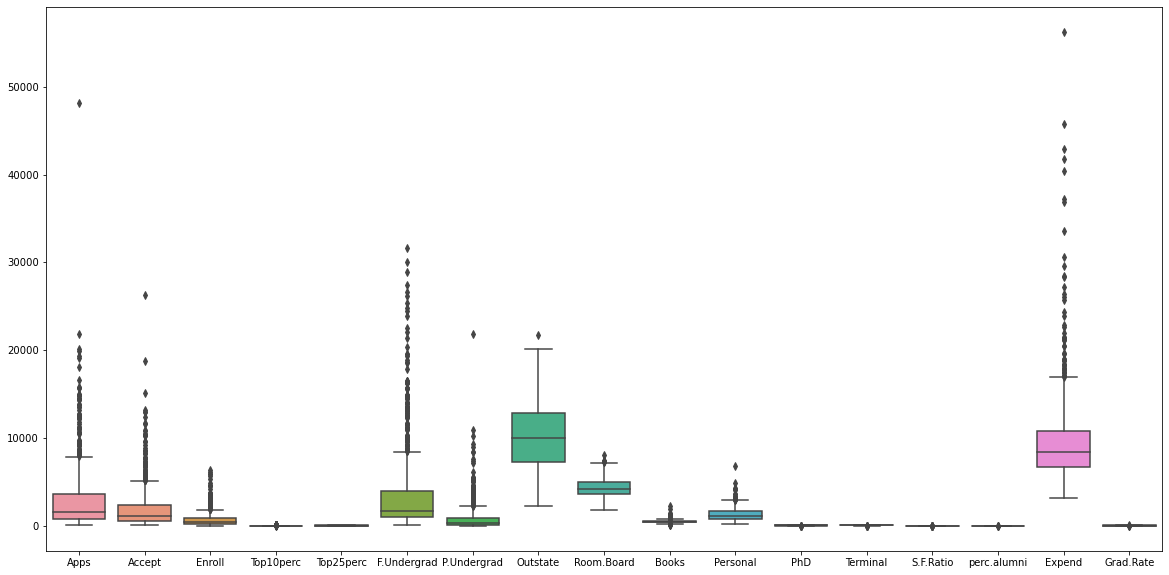

In [143]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=df2,orient="v")
plt.show()

# There are outliers almost all variable

In [4]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [5]:
df2.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [6]:
la,ua=remove_outlier(df2['Apps'])
df2['Apps']=np.where(df2['Apps']>ua,ua,df2['Apps'])
df2['Apps']=np.where(df2['Apps']<la,la,df2['Apps'])

lb,ub=remove_outlier(df2['Accept'])
df2['Accept']=np.where(df2['Accept']>ub,ub,df2['Accept'])
df2['Accept']=np.where(df2['Accept']<lb,lb,df2['Accept'])

lc,uc=remove_outlier(df2['Enroll'])
df2['Enroll']=np.where(df2['Enroll']>uc,uc,df2['Enroll'])
df2['Enroll']=np.where(df2['Enroll']<lc,lc,df2['Enroll'])

ld,ud=remove_outlier(df2['Top10perc'])
df2['Top10perc']=np.where(df2['Top10perc']>ud,ud,df2['Top10perc'])
df2['Top10perc']=np.where(df2['Top10perc']<ld,ld,df2['Top10perc'])

le,ue=remove_outlier(df2['Top25perc'])
df2['Top25perc']=np.where(df2['Top25perc']>ue,ue,df2['Top25perc'])
df2['Top25perc']=np.where(df2['Top25perc']<le,le,df2['Top25perc'])

lf,uf=remove_outlier(df2['F.Undergrad'])
df2['F.Undergrad']=np.where(df2['F.Undergrad']>uf,uf,df2['F.Undergrad'])
df2['F.Undergrad']=np.where(df2['F.Undergrad']<lf,lf,df2['F.Undergrad'])


lg,ug=remove_outlier( df2['P.Undergrad'])
df2['P.Undergrad']=np.where(df2['P.Undergrad']>ug,ug,df2['P.Undergrad'])
df2['P.Undergrad']=np.where(df2['P.Undergrad']<lg,lg,df2['P.Undergrad'])

lh,uh=remove_outlier(df2['Outstate'])
df2['Outstate']=np.where(df2['Outstate']>uh,uh,df2['Outstate'])
df2['Outstate']=np.where(df2['Outstate']<lh,lh,df2['Outstate'])

li,ui=remove_outlier(df2['Room.Board'])
df2['Room.Board']=np.where(df2['Room.Board']>ui,ui,df2['Room.Board'])
df2['Room.Board']=np.where(df2['Room.Board']<li,li,df2['Room.Board'])

lj,uj=remove_outlier(df2['Books'])
df2['Books']=np.where(df2['Books']>uj,uj,df2['Books'])
df2['Books']=np.where(df2['Books']<lj,lj,df2['Books'])

lk,uk=remove_outlier(df2['Personal'])
df2['Personal']=np.where(df2['Personal']>uk,uk,df2['Personal'])
df2['Personal']=np.where(df2['Personal']<lk,lk,df2['Personal'])

lm,um=remove_outlier(df2['PhD'])
df2['PhD']=np.where(df2['PhD']>um,um,df2['PhD'])
df2['PhD']=np.where(df2['PhD']<lm,lm,df2['PhD'])

ln,un=remove_outlier(df2['Terminal'])
df2['Terminal']=np.where(df2['Terminal']>un,un,df2['Terminal'])
df2['Terminal']=np.where(df2['Terminal']<ln,ln,df2['Terminal'])

lo,uo=remove_outlier(df2['S.F.Ratio'])
df2['S.F.Ratio']=np.where(df2['S.F.Ratio']>uo,uo,df2['S.F.Ratio'])
df2['S.F.Ratio']=np.where(df2['S.F.Ratio']<lo,lo,df2['S.F.Ratio'])

lp,up=remove_outlier(df2['perc.alumni'])
df2['perc.alumni']=np.where(df2['perc.alumni']>up,up,df2['perc.alumni'])
df2['perc.alumni']=np.where(df2['perc.alumni']<lp,lp,df2['perc.alumni'])

lq,uq=remove_outlier(df2['Expend'])
df2['Expend']=np.where(df2['Expend']>uq,uq,df2['Expend'])
df2['Expend']=np.where(df2['Expend']<lq,lq,df2['Expend'])

lr,ur=remove_outlier(df2['Grad.Rate'])
df2['Grad.Rate']=np.where(df2['Grad.Rate']>ur,ur,df2['Grad.Rate'])
df2['Grad.Rate']=np.where(df2['Grad.Rate']<lr,lr,df2['Grad.Rate'])

In [77]:
df2.shape

(777, 17)

### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">After outlier treatment

In [147]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=df2,orient="v")
plt.show()

# there are no outliers in any varibale

# 2.2) Scale the variables and write the inference for using the type of scaling function for this case study.

### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea">Standardising before processing PCA

#### The aim of this step is to standardise the range of the continuous intial variables so that each one of them contributes equality to the analysis

#### This dataset contains different range of the continuous variable .so, it is important to standardised the variables


### <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Z score standardisation
#### Z score standardisation will return a normalized value (z-score) based on the mean and standard deviation. A z-score, or standard score, is used for standardizing scores on the same scale by dividing a score’s deviation by the standard deviation in a data set. The result is a standard score. It measures the number of standard deviations that a given data point is from the mean.
#### A z-score can be negative or positive. A negative score indicates a value less than the mean, and a positive score indicates a value greater than the mean. The average of every z-score for a data set is zero.

In [7]:
from scipy.stats import zscore
data_new=df2.apply(zscore)
data_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

### Inference
#### After standardised by zscore standardisation, all variables will be transformed into same scale

In [149]:
data_new.boxplot(figsize=(20,5))

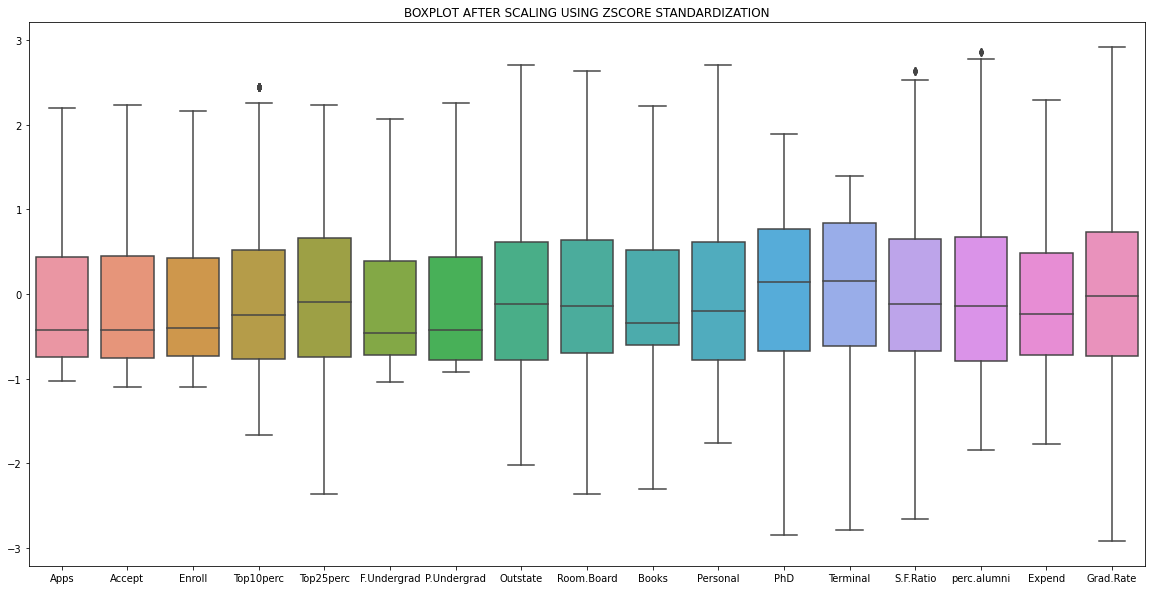

In [150]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=data_new,orient="v")
plt.title('BOXPLOT AFTER SCALING USING ZSCORE STANDARDIZATION')
plt.show()

In [151]:
from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler()

minmax_scale

MinMaxScaler()

In [152]:
data1 = minmax_scale.fit_transform(df2)
data1

array([[0.20204734, 0.22825659, 0.36941303, ..., 0.20689655, 0.28010899,
        0.445     ],
       [0.26935381, 0.36442346, 0.25686591, ..., 0.27586207, 0.53340599,
        0.405     ],
       [0.17236084, 0.20169225, 0.16208939, ..., 0.51724138, 0.40319709,
        0.385     ],
       ...,
       [0.25796545, 0.3626525 , 0.35541195, ..., 0.34482759, 0.37326067,
        0.335     ],
       [1.        , 0.46851633, 0.6903608 , ..., 0.84482759, 1.        ,
        0.835     ],
       [0.37210493, 0.35084612, 0.35325794, ..., 0.48275862, 0.09613079,
        0.835     ]])

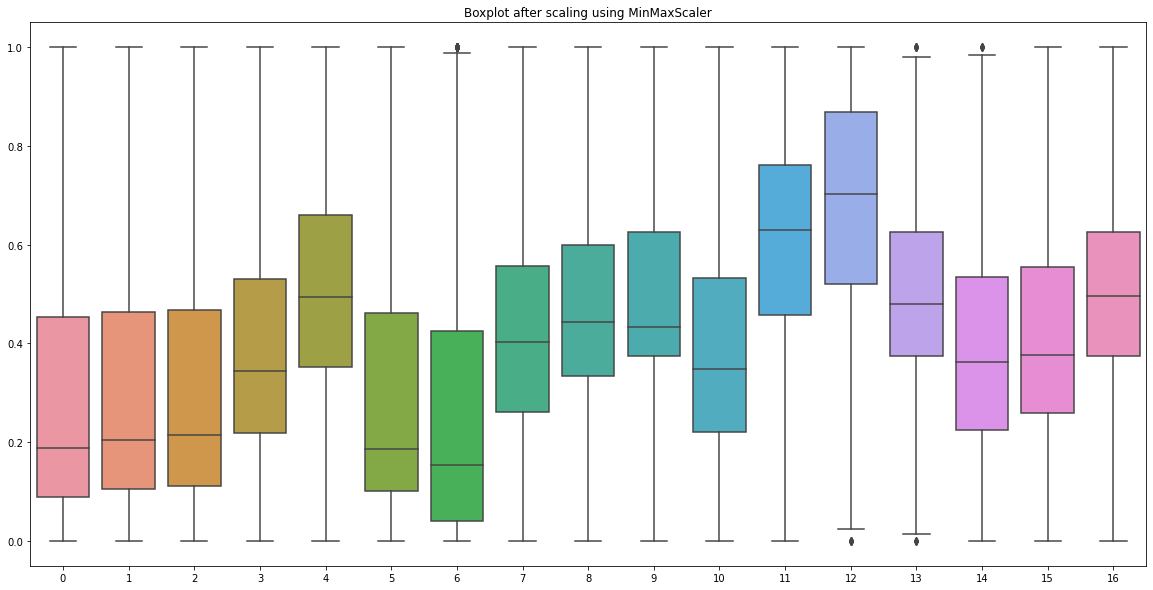

In [153]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=data1,orient="v")
plt.title('Boxplot after scaling using MinMaxScaler')
plt.show()

#### MaxMinscaler standardisation ,here scales are between 0 and 1 .
#### since we are interested in the components that maximize the variance,here i used Z score standardised data for rest of the analysis

# 2.3) Comment on the comparison between covariance and the correlation matrix after scaling.

# Create a covariance matrix for identifying Principal components

### The aim of this step is to understand how the variables of the input dataset are varying from the mean with respect to each other or to check any relationship between them
#### If Positive then the two variables increase or decrease together(correlated)
#### If Negative then one increases when the other decreases (inversely correlated)

In [8]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data_new)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 0.39728021 -0.18584152 -0.01909896 ... -0.05025984 -0.41106778
   0.17096373]
 [-0.18584152  1.61327963  0.08300998 ...  0.04838876 -0.10924942
  -0.22225919]
 [-0.01909896  0.08300998  0.21261253 ... -0.0385113   0.16013293
  -0.07338076]
 ...
 [-0.05025984  0.04838876 -0.0385113  ...  0.21807345 -0.05505902
  -0.0563193 ]
 [-0.41106778 -0.10924942  0.16013293 ... -0.05505902  1.52015207
  -0.48150377]
 [ 0.17096373 -0.22225919 -0.07338076 ... -0.0563193  -0.48150377
   0.74695292]]


In [9]:
#Even if we take the transpose of the covariance matrix it results in same value as that of the above
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-01

# Comparing Correlation and Covarince Matrix

#### "Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables. Correlation is a function of the covariance.

### Correlation before scaling

In [11]:

df_corr = df2.copy()
df_corr.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

### Correlation after standardisation
#### With standardisation also, correlation matrix yields same result.

In [12]:

data_new.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

### covariance matrix is not more than a table that summaries the correlations between all the possible pairs of variables .
#### With standardisation also, correlation matrix yields same result 
#### Correlation is a normalized form of covariance and not affected by scale. Both covariance and correlation measure the linear relationship between variables but cannot be used interchangeably.

# 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

In [158]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=df2,orient="v")
plt.title('BOXPLOT BEFORE SCALING USING ZSCORE STANDARDIZATION')
plt.show()

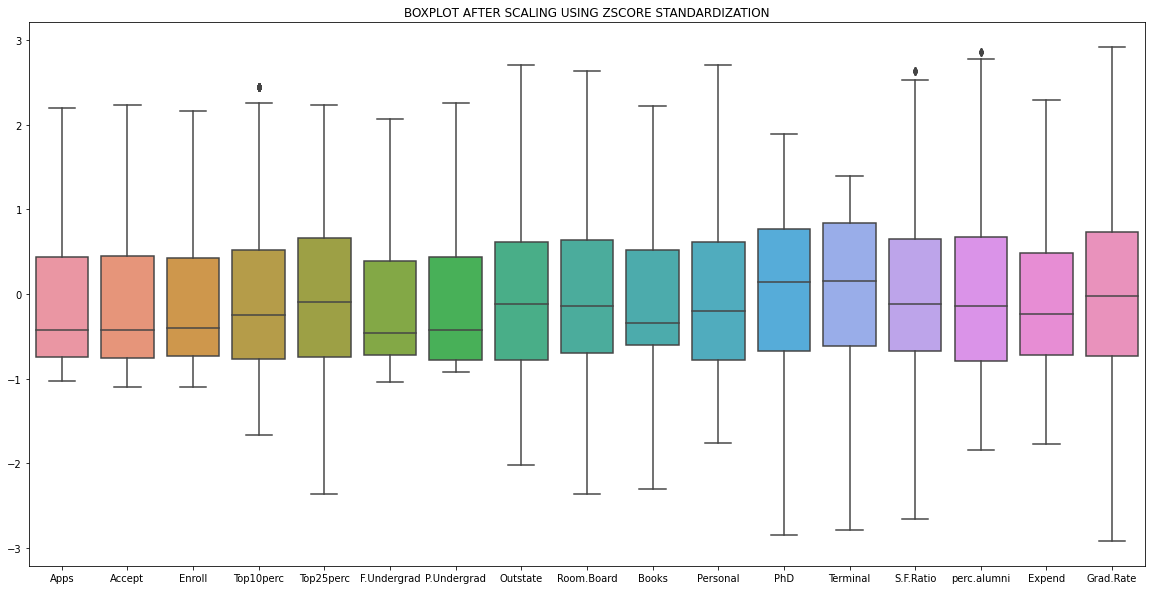

In [159]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=data_new,orient="v")
plt.title('BOXPLOT AFTER SCALING USING ZSCORE STANDARDIZATION')
plt.show()

# Before scaling ,each variable has different Range.
# After scaling , all the variable has almost same range between -3 to 3

# 2.5) Build the covariance matrix, eigenvalues and eigenvector.

In [10]:
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-01

# Identify eigen values and eigen vector

In [11]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('Eigen Vectors \n %s', eig_vecs)



 Eigen Values 
 %s [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]
Eigen Vectors 
 %s [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.33

#### The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.
#### In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

# 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

In [13]:

print('first eigen vector\n',eig_vecs[0])
#eig_vecs[0]

first eigen vector
 [-0.26217154  0.31413626  0.08101772 -0.09877617 -0.21989808  0.00218801
 -0.02837151 -0.08994981  0.130567   -0.15646446 -0.08621328  0.18216981
 -0.59913764  0.08997753  0.08886979  0.5494284   0.00541454]


#### Eigenvectors and eigenvalues exist in pairs: every eigenvector has a corresponding eigenvalue. An eigenvector is a direction and An eigenvalue is a number, telling you how much variance there is in the data in that direction.The eigenvector with the highest eigenvalue is therefore the principal component.the amount of eigenvectors/values that exist equals the number of dimensions the data set has
#### In this data, first eigenvector has high eigenvalue and therefore it forms first principal component. The number of eigenvectors / values is 17 that has 17 number of dimensions. Later in analysis, we can drop least values


# As per given Scree Plot, how many principal components are preferred?

In [164]:
fig = plt.figure(figsize=(8,5))
vals = range(data_new.shape[1])
plt.plot(vals, eig_vals, 'ro-', linewidth=2)
plt.plot(range(0,11),np.ones(11))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#### A scree plot visualizes the dimensionality of the data.
#### The scree plot shows the cumulative variance explained by each principal component.

#### Visually we can observe that there is steep drop in variance explained with increase in number of PC's.
#### We will proceed with 8 components here. But depending on requirement 80% variation or 6 components will also do good

# 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?


In [15]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


In [16]:
var_exp

[33.26608366671335,
 28.755345008170792,
 6.617163554717721,
 5.8981439576238355,
 5.123892672339129,
 4.498638671547017,
 3.4362426556658123,
 3.1988471732052015,
 2.4881075492912634,
 2.238396454242056,
 1.4511567777537848,
 0.865143448811298,
 0.7892466165436445,
 0.5806273152471927,
 0.4387876862118994,
 0.2226187168145212,
 0.13155807510148815]

In [167]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### cumulative explained variance ratio has a ability to estimate how many components are needed to describe the data.
#### first Individual explained variance covers 33.26% of data
#### second  Individual explained variance covers 62.02% of data
#### sixth  Individual explained variance covers nearly 84.159% of data

# Perform PCA and export the data of the Principal Component scores into a data frame.


In [17]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-1.60249937, -1.80467545, -1.60828257, ..., -0.57688267,
         6.570952  , -0.47739307],
       [ 0.99368301, -0.07041499, -1.38279212, ...,  0.01779846,
        -1.18493014,  1.04394672],
       [ 0.03004477,  2.12212752, -0.50151255, ...,  0.32216033,
         1.32596562, -1.42543835],
       [-1.00842236,  3.13894108, -0.03637346, ..., -0.58725874,
         0.07770719, -1.30027367],
       [-0.3668863 ,  2.45321198,  0.76599686, ...,  0.17522462,
         1.36851636,  0.72091759],
       [-0.69747587,  0.99485857, -1.02623665, ...,  0.50404281,
        -0.82274578,  1.05180969]])

In [18]:
PCA=pca.components_
PCA

array([[ 2.62171542e-01,  2.30562461e-01,  1.89276397e-01,
         3.38874521e-01,  3.34690532e-01,  1.63293010e-01,
         2.24797091e-02,  2.83547285e-01,  2.44186588e-01,
         9.67082754e-02, -3.52299594e-02,  3.26410696e-01,
         3.23115980e-01, -1.63151642e-01,  1.86610828e-01,
         3.28955847e-01,  2.38822447e-01],
       [ 3.14136258e-01,  3.44623583e-01,  3.82813322e-01,
        -9.93191661e-02, -5.95055011e-02,  3.98636372e-01,
         3.57550046e-01, -2.51863617e-01, -1.31909124e-01,
         9.39739472e-02,  2.32439594e-01,  5.51390195e-02,
         4.30332048e-02,  2.59804556e-01, -2.57092552e-01,
        -1.60008951e-01, -1.67523664e-01],
       [-8.10177243e-02, -1.07658626e-01, -8.55296888e-02,
         7.88293848e-02,  5.07938247e-02, -7.37077830e-02,
        -4.03568700e-02, -1.49394795e-02,  2.11379165e-02,
         6.97121128e-01,  5.30972806e-01, -8.11134044e-02,
        -5.89785929e-02, -2.74150657e-01, -1.03715887e-01,
         1.84205687e-01, -2.4

In [19]:
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144, 0.05123893,
       0.04498639])

In [20]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([33.3, 62.1, 68.7, 74.6, 79.7, 84.2])

In [21]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(40,100)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

# Correlation between components and features

In [22]:
col =list(data_new)
col

['Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate']

In [24]:
df4 = pd.DataFrame(PCA,columns=list(data_new))

df4.index = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4','PCA_5','PCA_6'] 
df4.head(6)


Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
PCA_1  0.262172  0.230562  0.189276   0.338875   0.334691     0.163293   
PCA_2  0.314136  0.344624  0.382813  -0.099319  -0.059506     0.398636   
PCA_3 -0.081018 -0.107659 -0.085530   0.078829   0.050794    -0.073708   
PCA_4  0.098776  0.118140  0.009307  -0.369115  -0.416824     0.013950   
PCA_5  0.219898  0.189635  0.162315   0.157211   0.144449     0.102728   
PCA_6  0.002188 -0.016521 -0.068079  -0.088866  -0.027627    -0.051647   

       P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
PCA_1     0.022480  0.283547    0.244187  0.096708 -0.035230  0.326411   
PCA_2     0.357550 -0.251864   -0.131909  0.093974  0.232440  0.055139   
PCA_3    -0.040357 -0.014939    0.021138  0.697121  0.530973 -0.081113   
PCA_4     0.225351  0.262975    0.580894 -0.036156 -0.114983 -0.147261   
PCA_5    -0.095679  0.037275   -0.069108  0.035406 -0.000475 -0.550787   
PCA_6    -0.024538 -0.020386    0.237267  0.638605 -0.381496  0.003344   

       Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
PCA_1  0.323116  -0.163152     0.186611  0.328956   0.238822  
PCA_2  0.043033   0.259805    -0.257093 -0.160009  -0.167524  
PCA_3 -0.058979  -0.274151    -0.103716  0.184206  -0.245336  
PCA_4 -0.089008  -0.259486    -0.223982  0.213756  -0.036192  
PCA_5 -0.590407  -0.142843     0.128216 -0.022424   0.356843  
PCA_6  0.035412   0.468753     0.012567 -0.231562   0.313556

In [68]:
print(" DATA FRAME OF PRINCIPAL COMPONENT SCORE ")
df4.T


 DATA FRAME OF PRINCIPAL COMPONENT SCORE 


PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6
Apps         0.262172  0.314136 -0.081018  0.098776  0.219898  0.002188
Accept       0.230562  0.344624 -0.107659  0.118140  0.189635 -0.016521
Enroll       0.189276  0.382813 -0.085530  0.009307  0.162315 -0.068079
Top10perc    0.338875 -0.099319  0.078829 -0.369115  0.157211 -0.088866
Top25perc    0.334691 -0.059506  0.050794 -0.416824  0.144449 -0.027627
F.Undergrad  0.163293  0.398636 -0.073708  0.013950  0.102728 -0.051647
P.Undergrad  0.022480  0.357550 -0.040357  0.225351 -0.095679 -0.024538
Outstate     0.283547 -0.251864 -0.014939  0.262975  0.037275 -0.020386
Room.Board   0.244187 -0.131909  0.021138  0.580894 -0.069108  0.237267
Books        0.096708  0.093974  0.697121 -0.036156  0.035406  0.638605
Personal    -0.035230  0.232440  0.530973 -0.114983 -0.000475 -0.381496
PhD          0.326411  0.055139 -0.081113 -0.147261 -0.550787  0.003344
Terminal     0.323116  0.043033 -0.058979 -0.089008 -0.590407  0.035412
S.F.Ratio   -0.163152  0.259805 -0.274151 -0.259486 -0.142843  0.468753
perc.alumni  0.186611 -0.257093 -0.103716 -0.223982  0.128216  0.012567
Expend       0.328956 -0.160009  0.184206  0.213756 -0.022424 -0.231562
Grad.Rate    0.238822 -0.167524 -0.245336 -0.036192  0.356843  0.313556

### Correlation of Principal component dataframe

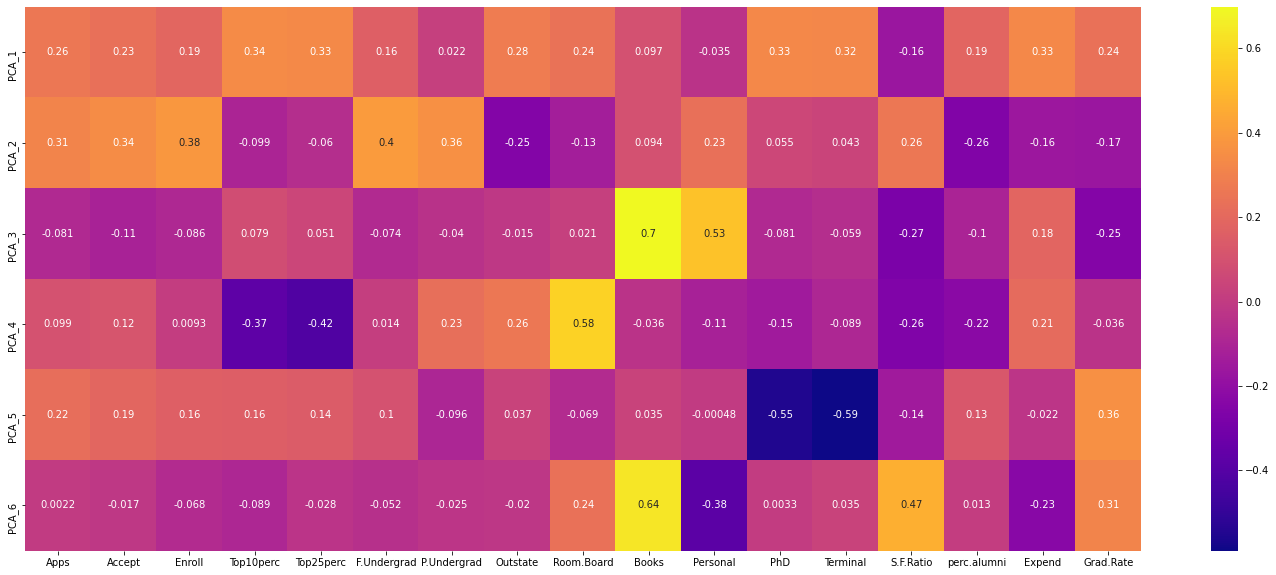

In [27]:
plt.subplots(figsize=(25,10))
sns.heatmap(df4,cmap='plasma',annot=True)

In [70]:
print('First principal component')
x=pca.components_[0]
x


First principal component


array([ 0.26217154,  0.23056246,  0.1892764 ,  0.33887452,  0.33469053,
        0.16329301,  0.02247971,  0.28354729,  0.24418659,  0.09670828,
       -0.03522996,  0.3264107 ,  0.32311598, -0.16315164,  0.18661083,
        0.32895585,  0.23882245])

In [ ]:
# Inference:


In [71]:
print('second principal component')
y=pca.components_[1]
y

second principal component


array([ 0.31413626,  0.34462358,  0.38281332, -0.09931917, -0.0595055 ,
        0.39863637,  0.35755005, -0.25186362, -0.13190912,  0.09397395,
        0.23243959,  0.05513902,  0.0430332 ,  0.25980456, -0.25709255,
       -0.16000895, -0.16752366])

In [72]:
print('Third principal component')
z=pca.components_[2]
z

Third principal component


array([-0.08101772, -0.10765863, -0.08552969,  0.07882938,  0.05079382,
       -0.07370778, -0.04035687, -0.01493948,  0.02113792,  0.69712113,
        0.53097281, -0.0811134 , -0.05897859, -0.27415066, -0.10371589,
        0.18420569, -0.24533584])

In [73]:
print('Fourth principal component')
x1=pca.components_[3]
x1

Fourth principal component


array([ 0.09877617,  0.11814044,  0.00930717, -0.36911503, -0.41682436,
        0.01395044,  0.22535108,  0.26297538,  0.58089413, -0.03615629,
       -0.11498297, -0.14726089, -0.08900799, -0.25948612, -0.22398247,
        0.21375614, -0.03619151])

In [74]:
print('Fifth principal component')
y1=pca.components_[4]
y1

Fifth principal component


array([ 2.19898078e-01,  1.89634945e-01,  1.62314811e-01,  1.57211017e-01,
        1.44449474e-01,  1.02728473e-01, -9.56790180e-02,  3.72750884e-02,
       -6.91080880e-02,  3.54056654e-02, -4.75358127e-04, -5.50786546e-01,
       -5.90407136e-01, -1.42842546e-01,  1.28215769e-01, -2.24240837e-02,
        3.56843227e-01])

In [75]:
print('sixth principal component')
z1=pca.components_[5]
z1

sixth principal component


array([ 0.002188  , -0.01652128, -0.06807942, -0.08886568, -0.0276269 ,
       -0.05164687, -0.02453757, -0.02038605,  0.23726741,  0.638605  ,
       -0.38149585,  0.00334445,  0.03541213,  0.4687526 ,  0.01256694,
       -0.23156232,  0.31355624])

Text(0, 0.5, 'Second Principal Component')

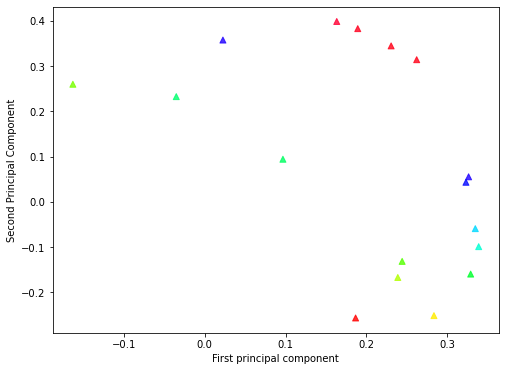

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha = 0.8,c = (x + y ), cmap = my_cmap, marker ='^')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Fourth Principal Component')

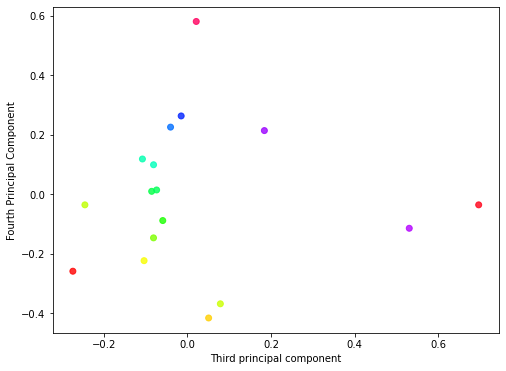

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(z, x1, alpha = 0.8,c = (z + x1 ), cmap = my_cmap, marker ='o')
plt.xlabel('Third principal component')
plt.ylabel('Fourth Principal Component')

Text(0, 0.5, 'sixth Principal Component')

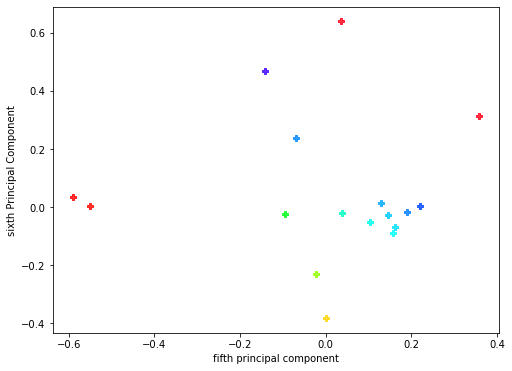

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(y1, z1, alpha = 0.8,c = (y1 + z1 ), cmap = my_cmap, marker ='P')
plt.xlabel('fifth principal component')
plt.ylabel('sixth Principal Component')

In [34]:

# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 

 
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z), 
                    cmap = my_cmap, 
                    marker ='^')
 
plt.title("PRINCIPAL COMPONENT ANALYSIS", fontweight ='bold',color = 'red')
ax.set_xlabel('FIRST PCA', fontweight ='bold') 
ax.set_ylabel('SECOND PCA', fontweight ='bold') 
ax.set_zlabel('THIRD PCA', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [37]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x1, y1, z1,
                    alpha = 0.8,
                    c = (x1 + y1 + z1), 
                    cmap = my_cmap, 
                    marker ='^')
 
plt.title("PRINCIPAL COMPONENT ANALYSIS", fontweight ='bold',color = 'red')
ax.set_xlabel('FOURTH PCA', fontweight ='bold') 
ax.set_ylabel('FIFTH PCA', fontweight ='bold') 
ax.set_zlabel('SIXTH PCA', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [ ]:
display_circles(pca, num_components, pca, [(0,1)], labels = np.array(X.columns),)

# 2.8) Mention the business implication of using the Principal Component Analysis for this case study.

#### First Principal analysis - PCA_1 :
####  The first principal component accounts for the largest possible variable in the dataset
#### The first principal component is moderately correlated with five of its original values and it has largest possible variance. The first principal component increases with increasing Top10Perc, Top25perc, Expend, PhD and Terminal scores. This suggests that these five criteria vary together. If one increases, then the remaining ones tend to increase as well
#### Top10perc (Percentage of new from top 10% of Higher secondary class) is more correlated. Universities concentrate more on top 10% of high scored students in Higher secondary Class and then they concentrate on the top 25% high scored Students. so, For the university acceptance, they are looking for high scored students of higher secondary class
#### instructional spending is the amount each institution spends on the units that run its educational programs. here it shows that instructional spending per student is positively correlated with the portion of the budget devoted to instruction.
#### The percentage of faculties of PhD and terminal degree increases as top10 percentage and top25 percentage students increases
#### Second Principal analysis - PCA_2:
#### The second principal component is calculated in the same way, with the condition that it is uncorrelated with (i.e., Perpendicular to) the first prinicipal component and its accounts for next highest variance
#### The second principal component is moderately correlated with Five scores. They are F.Undergrad, Enroll, P.Undergrad, Accept and apps features. no of Application received and no of acceptance and enrolled are correlated. If the no of application increases, there is chance of increase in number of Acceptance and enrollment in full time and part time undergraduate program.
#### There are some negative correlated scores, one feature increases when the other features decrease.
#### Third Principal analysis - PCA_3:
#### The third principal components are highly correlated with books and Personal features. Estimated Book cost and estimated personnel spending should be increased for a student
#### Fourth Principal analysis - PCA_4:
#### The fourth principal analysis is moderately correlated with Room. Board Lightly correlated with Outstate

#### Conclusion:
#### Principal Component Analysis (PCA) is a dimensionality reduction technique. The principal application of PCA is dimension reduction. If you have high dimensional data, PCA allows you to reduce the dimensionality of your data so the bulk of the variation that exists in your data across many high dimensions is captured in fewer dimensions.
#### Based on Principal component analysis done on various parameters of various institutions:
#### In this Education _Post 12th standard dataset, there are 17 parameters. After Principal components analysis, dimension reduction leads to main five parameters. They are Top10perc, Top25perc, Expend, PhD and Terminal.
#### During Universities acceptance for Undergrad program, they should concentrate mainly on these parameters like the top 10 %, total 25% of higher secondary class, the instructional expenditure per student, percentage of facilities with PhD and terminal degrees. Because, if one the parameter increases, other parameters also increases.


